# Data 102 Spring 2023 Lecture 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()  # This helps make our plots look nicer

# These make our figures bigger
plt.rcParams['figure.figsize'] = (6, 4.5)
plt.rcParams['figure.dpi'] = 100

## Multiple hypothesis testing and decisions

Suppose we have a collection of $p$-values, with ground truth labels.

In [2]:
p_values_orig = pd.read_csv('pvalues.csv')
p_values = p_values_orig.copy()
p_values.head()

,pvalue,is_alternative
0,0.226410,1
1,0.053205,1
2,0.001128,1
3,0.404488,1
4,0.401786,0


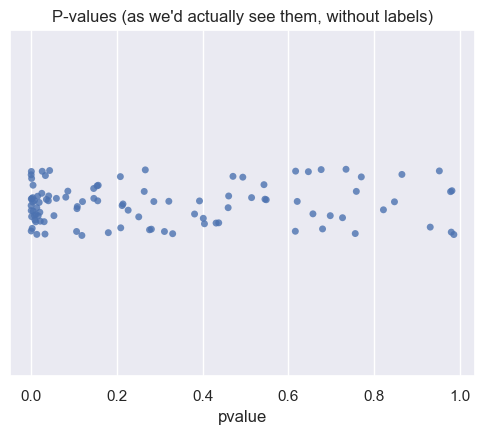

In [3]:
sns.stripplot(
    data=p_values, x='pvalue',
    alpha = 0.8, order = [0, 1], orient = "h",
    #ax=ax
)
plt.title("P-values (as we'd actually see them, without labels)");

Text(0.5, 1.0, 'P-values, with ground truth labels')

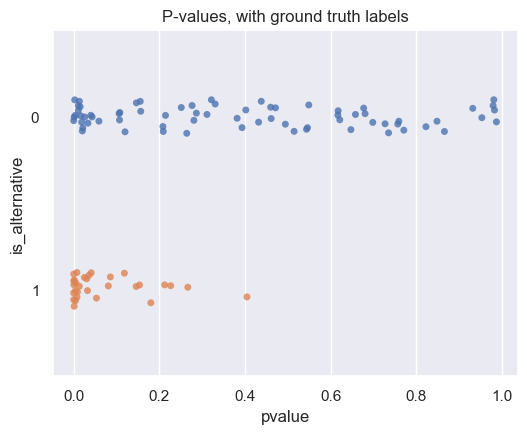

In [4]:
sns.stripplot(
    data=p_values, x='pvalue', y='is_alternative', 
    alpha = 0.8, order = [0, 1], orient = "h",
)
plt.title('P-values, with ground truth labels')

Text(0.5, 1.0, 'P-values and decisions using p-value threshold 0.2, with ground truth labels')

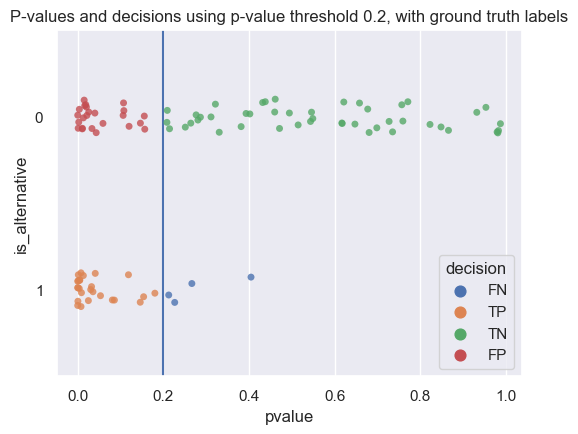

In [5]:
threshold = 0.2
p_values['decision'] = 'TP'
p_values.loc[(p_values['pvalue'] > threshold) & (~p_values['is_alternative']), 'decision'] = 'TN'
p_values.loc[(p_values['pvalue'] < threshold) & (~p_values['is_alternative']), 'decision'] = 'FP'
p_values.loc[(p_values['pvalue'] > threshold) & (p_values['is_alternative']), 'decision'] = 'FN'
sns.stripplot(
    data=p_values, x='pvalue', y='is_alternative', 
    alpha = 0.8, order = [0, 1], hue='decision', orient = "h",
)
plt.axvline(threshold)
plt.title('P-values and decisions using p-value threshold {}, with ground truth labels'.format(threshold))

Text(0.5, 1.0, 'P-values and decisions using p-value threshold 0.1, with ground truth labels')

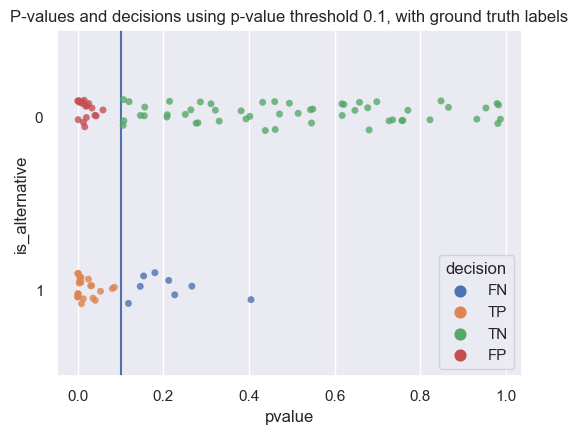

In [6]:
threshold = 0.1
p_values['decision'] = 'TP'
p_values.loc[(p_values['pvalue'] > threshold) & (~p_values['is_alternative']), 'decision'] = 'TN'
p_values.loc[(p_values['pvalue'] < threshold) & (~p_values['is_alternative']), 'decision'] = 'FP'
p_values.loc[(p_values['pvalue'] > threshold) & (p_values['is_alternative']), 'decision'] = 'FN'
sns.stripplot(
    data=p_values, x='pvalue', y='is_alternative', 
    alpha = 0.8, order = [0, 1], hue='decision', orient = "h",
)
plt.axvline(threshold)
plt.title('P-values and decisions using p-value threshold {}, with ground truth labels'.format(threshold))

Text(0.5, 1.0, "P-values (as we'd actually see them, without labels) and decisions using p-value threshold 0.2")

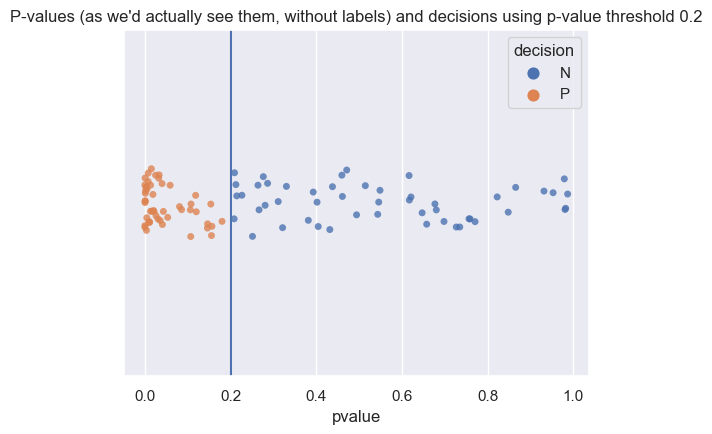

In [7]:
threshold = 0.2
p_values['decision'] = 'P'
p_values.loc[p_values['pvalue'] > threshold, 'decision'] = 'N'
p_values['y'] = 1
ax = sns.stripplot(
    data=p_values, x='pvalue', y ='y',
    alpha = 0.8, hue='decision', orient = "h"
)
ax.set(ylabel=None)
ax.set(yticklabels=[])
plt.axvline(threshold)
plt.title("P-values (as we'd actually see them, without labels) and decisions using p-value threshold {}".format(threshold))

## Controlling FWER with Bonferroni

Text(0.5, 1.0, 'P-values and decisions using p-value threshold 0.05, with ground truth labels')

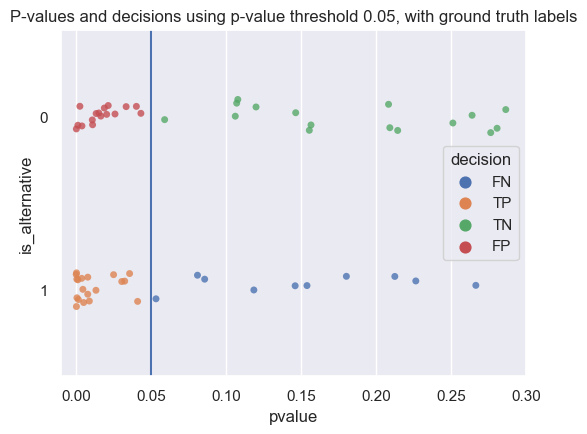

In [8]:
threshold = 0.05
p_values['decision'] = 'TP'
p_values.loc[(p_values['pvalue'] > threshold) & (~p_values['is_alternative']), 'decision'] = 'TN'
p_values.loc[(p_values['pvalue'] < threshold) & (~p_values['is_alternative']), 'decision'] = 'FP'
p_values.loc[(p_values['pvalue'] > threshold) & (p_values['is_alternative']), 'decision'] = 'FN'
sns.stripplot(
    data=p_values, x='pvalue', y='is_alternative', 
    alpha = 0.8, order = [0, 1], hue='decision', orient = "h",
)
plt.xlim(-0.01, 0.3)
plt.axvline(threshold)
plt.title('P-values and decisions using p-value threshold {}, with ground truth labels'.format(threshold))

Text(0.5, 1.0, 'P-values and decisions using p-value threshold 0.0005, with ground truth labels')

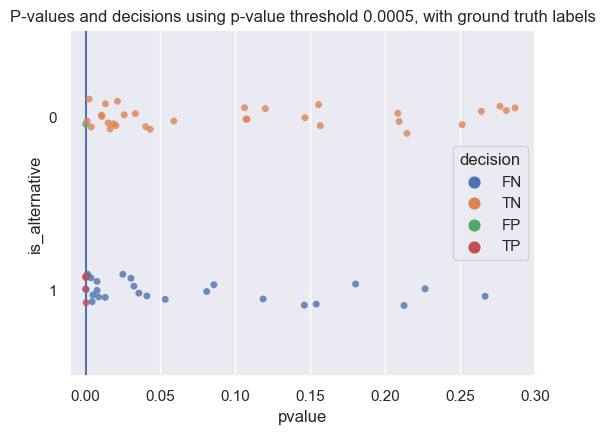

In [9]:
threshold = 0.05
threshold /= p_values.shape[0]
p_values['decision'] = 'TP'
p_values.loc[(p_values['pvalue'] > threshold) & (~p_values['is_alternative']), 'decision'] = 'TN'
p_values.loc[(p_values['pvalue'] < threshold) & (~p_values['is_alternative']), 'decision'] = 'FP'
p_values.loc[(p_values['pvalue'] > threshold) & (p_values['is_alternative']), 'decision'] = 'FN'
sns.stripplot(
    data=p_values, x='pvalue', y='is_alternative', 
    alpha = 0.8, order = [0, 1], hue='decision', orient = "h",
)
plt.xlim(-0.01, 0.3)
plt.axvline(threshold)
plt.title('P-values and decisions using p-value threshold {}, with ground truth labels'.format(threshold))

## Controlling FDR with Benjamini-Hochberg

In [10]:
p_sorted = p_values_orig.sort_values('pvalue')

In [11]:
m = len(p_sorted)  # number of tests
k = np.arange(1, m+1)  # index of each test in sorted order
p_sorted['k'] = k 
p_sorted

,pvalue,is_alternative,k
94,0.000008,1,1
10,0.000109,0,2
86,0.000162,1,3
99,0.000219,1,4
42,0.000436,1,5
...,...,...,...
45,0.952674,0,96
9,0.978843,0,97
22,0.980498,0,98
76,0.982076,0,99


In [12]:
alpha = .05

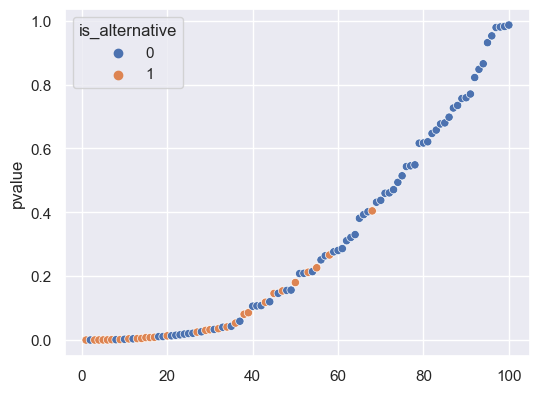

In [13]:
sns.scatterplot(x=k, y=p_sorted['pvalue'], hue=p_sorted['is_alternative']);

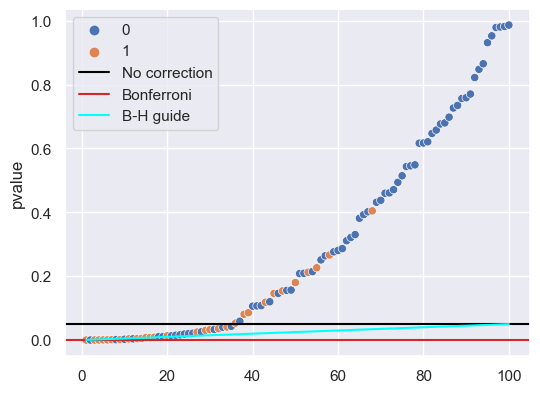

In [14]:
sns.scatterplot(x=k, y=p_sorted['pvalue'], hue=p_sorted['is_alternative']);
plt.axhline(alpha, label='No correction', color='black')
plt.axhline(alpha / m, label='Bonferroni', color='tab:red')
plt.plot(k, k/m * alpha, label='B-H guide', color='cyan')
plt.legend();

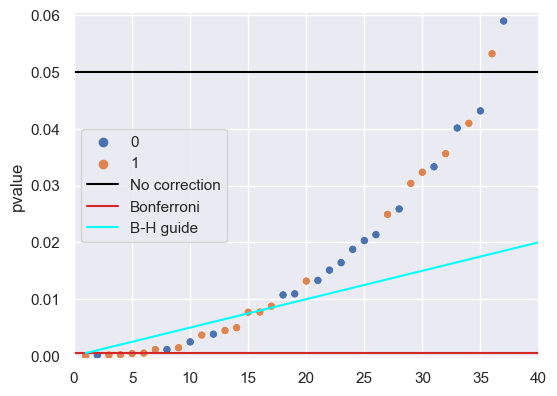

In [15]:
sns.scatterplot(x=k, y=p_sorted['pvalue'], hue=p_sorted['is_alternative']);
plt.axhline(alpha, label='No correction', color='black')
plt.axhline(alpha / m, label='Bonferroni', color='tab:red')
plt.plot(k, k/m * alpha, label='B-H guide', color='cyan')

plt.axis([-0.05, 40, -0.0005, 0.0605])
plt.legend();